<h1><center><font color=darkcyan>  Apprentissage Statistiques </font></center></h1>

<h2><center><font color=darkorange>TP. Introduction à Python et SVM</font></center></h2>

<lu>
    <li><font color=darkblue> SOPGOUI MBEUKAM Lionel</font></li>
</lu>
<hr>

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import csv
from statsmodels.stats.multitest import fdrcorrection
import warnings
warnings.filterwarnings("ignore")

## Question 1

In [2]:
A = np.random.randint(2, size=(8, 8))
A

array([[0, 1, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 0, 1]])

## Question 2

In [3]:
M = np.array([[1, 5, 9, 13, 17],[2, 6, 10, 14, 18], [3, 7, 11, 15, 19],[4, 8, 12, 16, 20]])
N = np.transpose(M[[1, 2, 0]])
N[[1, 4, 2]].transpose()

array([[ 6, 18, 10],
       [ 7, 19, 11],
       [ 5, 17,  9]])

## Question 3

In [4]:
x = 2 * np.random.random_sample(15) - 1
x

array([-0.02532802, -0.09315658, -0.41053691,  0.22068139, -0.7386064 ,
       -0.83682908, -0.47073366,  0.01351905,  0.58318781, -0.45429751,
        0.88231503,  0.24766496, -0.99381394,  0.96653226,  0.24485475])

## Question 4

In [5]:
g = lambda x: (3/2) * (x**3) - (x**2) - (3/4)*x + 1
y = g(x)  + (1/20) * np.random.randn(15)
y

array([ 0.93230112,  0.98575023,  1.05572277,  0.87754565,  0.39421172,
        0.02674067,  1.00057854,  1.04401673,  0.51444823,  0.9323838 ,
        0.61488436,  0.7513342 , -0.67689721,  0.68351481,  0.73934967])

## Question 5

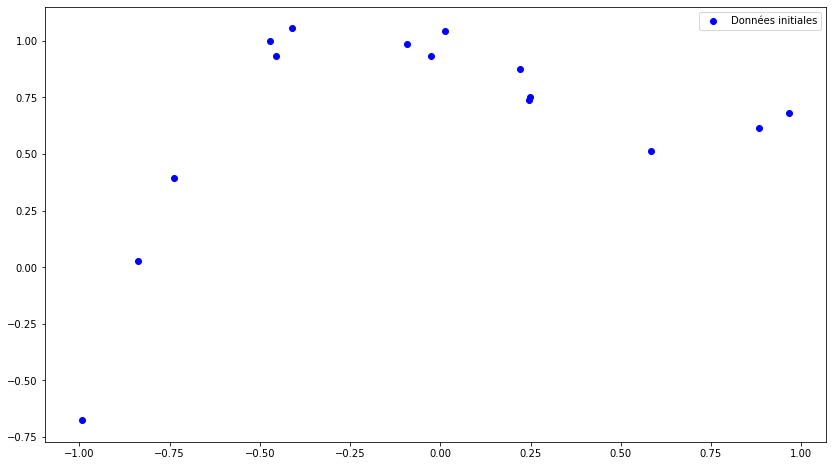

In [6]:
plt.figure(1, figsize=(14,8))
plt.scatter(x, y, color ="blue", label="Données initiales")
plt.legend()

## Question 6

In [7]:
x_test = 2 * np.random.random_sample(30) - 1

In [8]:
y_test = g(x_test)  + (1/20) * np.random.randn(30)

## Question 7

In [9]:
from sklearn.linear_model import LinearRegression
f = LinearRegression()

In [10]:
X = x[:,np.newaxis]
X_test = x_test[:,np.newaxis]

In [11]:
f.fit(X, y)
y_predict_rl = f.predict(X)
y_test_predict_rl = f.predict(X_test)

In [12]:
print(" y = ", f.coef_[0], "x + ", f.intercept_)

 y =  0.3118240556936891 x +  0.6763647864969526


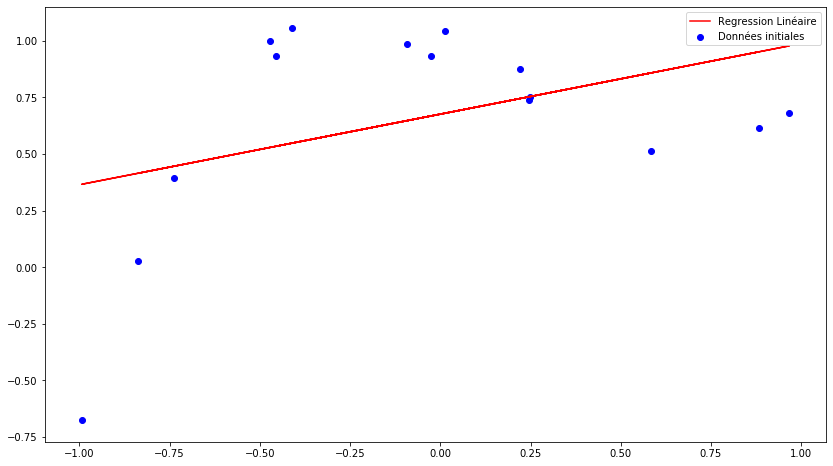

In [13]:
plt.figure(1, figsize=(14,8))
plt.scatter(x, y, color ="blue", label="Données initiales")
plt.plot(X, f.coef_*X+f.intercept_, color = "red", label="Regression Linéaire")
plt.legend()

## Question 8

In [14]:
from sklearn.metrics import mean_squared_error 
print("EQM Apprentissage = ", np.sqrt(mean_squared_error(y, y_predict_rl)) )
print("EQM Test = ", np.sqrt(mean_squared_error(y_test, y_test_predict_rl)) )

EQM Apprentissage =  0.41083543678961676
EQM Test =  0.3837401348006797


Les erreurs quadratiques moyennes d'apprentissage et de test sont pratiquement égales.

## Question 9

In [15]:
from sklearn.preprocessing import PolynomialFeatures
phi = PolynomialFeatures(2,include_bias=False)
psi = phi.fit_transform(X)
psi_test = phi.transform(X_test)
f_poly = LinearRegression()
f_poly.fit(psi, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(" y = ", f_poly.coef_, "x + ", f_poly.intercept_)

 y =  [ 0.28922767 -0.95923395] x +  0.9987893124895397


In [17]:
f_poly.coef_.dot(psi.transpose())+f_poly.intercept_

array([ 0.99084839,  0.96352148,  0.71838086,  1.01590152,  0.26186397,
        0.08502005,  0.65008329,  1.00252408,  0.8412202 ,  0.66942122,
        0.50723496,  1.01158344, -0.23605207,  0.38223559,  1.01209831])

In [18]:
y_predict_po = f_poly.predict(psi)
y_test_predict_po = f_poly.predict(psi_test)

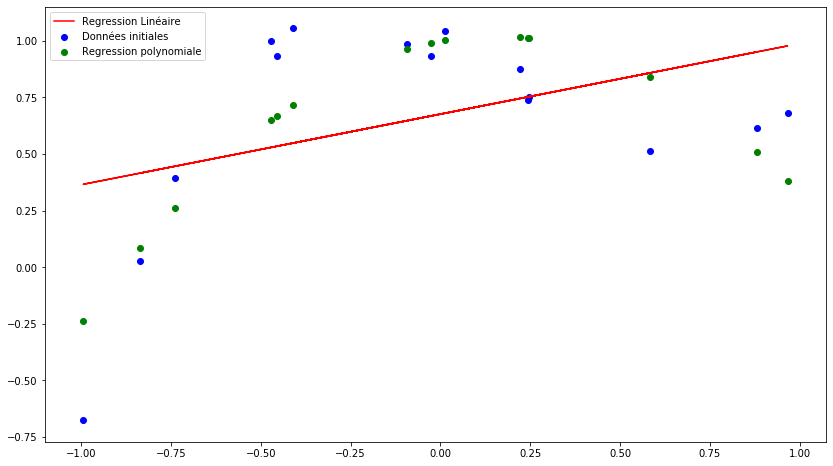

In [19]:
plt.figure(1, figsize=(14,8))
plt.scatter(x, y, color ="blue", label="Données initiales")
plt.plot(X, f.coef_*X+f.intercept_, color = "red", label="Regression Linéaire")
plt.scatter(X, y_predict_po, color = "green", label="Regression polynomiale")
plt.legend()

In [20]:
print("EQM Apprentissage = ", np.sqrt(mean_squared_error(y, y_predict_po)) )
print("EQM Test = ", np.sqrt(mean_squared_error(y_test, y_test_predict_po)) )

EQM Apprentissage =  0.2445536767299267
EQM Test =  0.2207762897483798


## Question 10

In [21]:
def poly_estimator(n, X, y):
    phi = PolynomialFeatures(n,include_bias=False)
    psi = phi.fit_transform(X)
    f_poly = LinearRegression()
    f_poly.fit(psi, y)
    return phi, f_poly

In [22]:
p3 = poly_estimator(3, X, y)
y_predict_3 = p3[1].predict(p3[0].transform(X))
p4 = poly_estimator(4, X, y)
y_predict_4 = p4[1].predict(p4[0].transform(X))
p13 = poly_estimator(13, X, y)
y_predict_13 = p13[1].predict(p13[0].transform(X))
p14 = poly_estimator(14, X, y)
y_predict_14 = p14[1].predict(p14[0].transform(X))

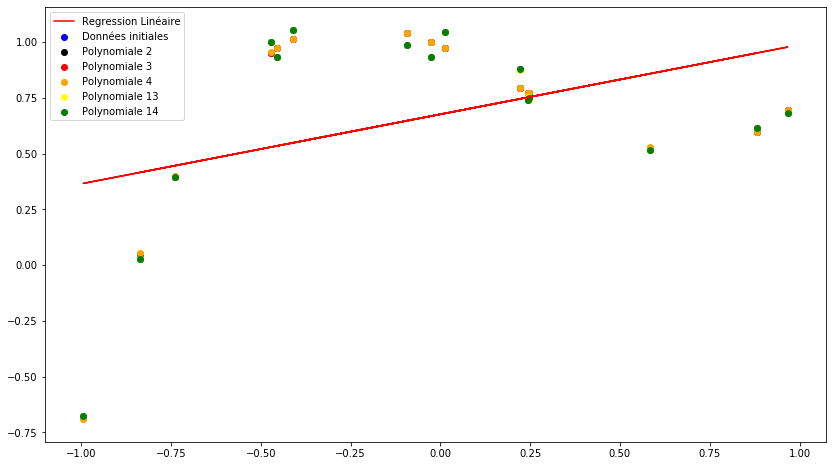

In [23]:
plt.figure(1, figsize=(14,8))
plt.scatter(x, y, color ="blue", label="Données initiales")
plt.plot(X, f.coef_*X+f.intercept_, color = "red", label="Regression Linéaire")
plt.scatter(X, y_predict_3, color = "black", label="Polynomiale 2")
plt.scatter(X, y_predict_3, color = "red", label="Polynomiale 3")
plt.scatter(X, y_predict_4, color = "orange", label="Polynomiale 4")
plt.scatter(X, y_predict_13, color = "yellow", label="Polynomiale 13")
plt.scatter(X, y_predict_14, color = "green", label="Polynomiale 14")
plt.legend()

In [24]:
k = 15
ea = []
et = []
for i in range(1, k):
    pk = poly_estimator(i, X, y)
    y_predict_k = pk[1].predict(pk[0].transform(X))
    y_test_predict_k = pk[1].predict(pk[0].transform(X_test))
    ea.append( np.sqrt(mean_squared_error(y, y_predict_k) ) )
    et.append(np.sqrt(mean_squared_error(y_test, y_test_predict_k)) )

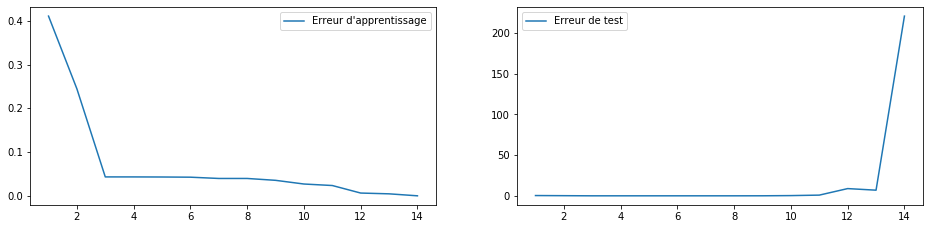

In [25]:
plt.figure(1, figsize=(16,8))
plt.subplot(2, 2, 1)
plt.plot([i for i in range(1, k)], ea, label="Erreur d'apprentissage")
plt.legend()
plt.subplot(2, 2,2)
plt.plot([i for i in range(1, k)], et, label="Erreur de test")
plt.legend()
plt.show()

Pendant que l'erreur d'apprentissage diminue avec le dégré du polynome, l'erreur de test augmente avec un très grand saut pour n = 13

## Question 11

In [26]:
from sklearn.linear_model import Lasso
phi = PolynomialFeatures(14,include_bias=False)
psi = phi.fit_transform(X)
psi_test = phi.fit_transform(X_test)
alpha = [10**(-k) for k in range(7)]

In [27]:
def number_of_null(t):
    n = 0
    for i in t:
        if i == 0:
            n = n+1
    return len(t) - n

In [28]:
y_pred = []
number_coeff_not_null = []
ea = []
et = []
for a in alpha:
    f = Lasso(a)
    f.fit(psi, y)
    y_pred.append(f.predict(psi))
    number_coeff_not_null.append(number_of_null(f.coef_))
    
    ea.append( np.sqrt(mean_squared_error(y, f.predict(psi)) ) )
    et.append(np.sqrt(mean_squared_error(y_test, f.predict(psi_test))) )

In [29]:
number_coeff_not_null

[0, 2, 4, 5, 7, 11, 14]

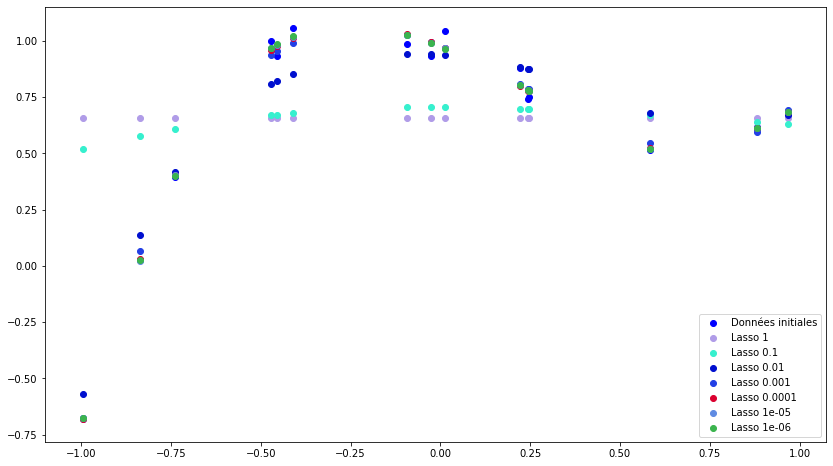

In [30]:
plt.figure(1, figsize=(14,8))
plt.scatter(x, y, color ="blue", label="Données initiales")
number_of_colors = 7

for i in range(7):
    color = "#"+''.join([random.choice('012345689BCDEF') for j in range(6)])
    plt.scatter(X, y_pred[i], color = color, label="Lasso "+str(alpha[i]))
plt.legend()

On remarque que plus on diminue le coefficient alpha, le nombre de coefficient restant après la regression augmente.

## Question 12

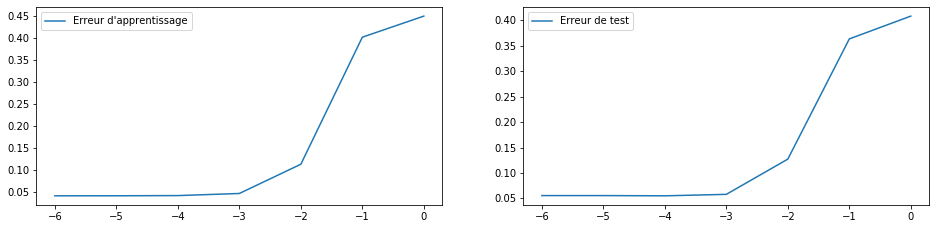

In [31]:
plt.figure(1, figsize=(16,8))
plt.subplot(2, 2, 1)
plt.plot(np.log10(alpha), ea, label="Erreur d'apprentissage")
plt.legend()
plt.subplot(2, 2,2)
plt.plot(np.log10(alpha), et, label="Erreur de test")
plt.legend()
plt.show()

La valeur de $\alpha$ qui permet la meilleure estimation est $10^{-3}$, car sur l'erreur d'apprentissage, on observe un saut à cette valeur et pour l'erreur de test, on voit que la valeur est minimale.

## Question 13

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

## Question 14

In [43]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
Cs = [i for i in range(1, 50)]
scores = []
for C in Cs: 
    svm = LinearSVC(C=C).fit(X_train,y_train)
    scores.append(np.mean(cross_val_score(svm, X_train, y_train, cv=10)))

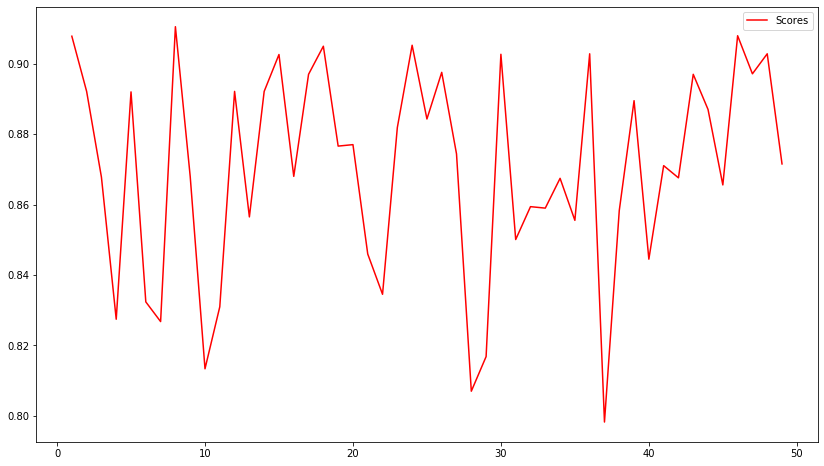

In [44]:
plt.figure(1, figsize=(14,8))
plt.plot(Cs, scores, color = "red", label="Scores")
plt.legend()

In [46]:
print("valeur de C optimale = ", np.argmin(scores)-1)

valeur de C optimale =  35


In [47]:
svm = LinearSVC(C=35).fit(X_train,y_train)

In [49]:
y_test_predict = svm.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test,y_test_predict)
print("Matrice de confusion \n",confusion_matrix_test)

Matrice de confusion 
 [[ 55  12]
 [  0 121]]


## Question 15

In [54]:
from sklearn.metrics import recall_score, precision_score
print('Recall: ',recall_score(y_test,y_test_predict,pos_label=0))
print('Precision: ',precision_score(y_test,y_test_predict,pos_label=0))

Recall:  0.8208955223880597
Precision:  1.0


On obient effectivement les mêmes résultats qu'à la question précédente car 
$\frac{55}{67} = 0.8208955223880597$ (recall) et $\frac{55}{55} = 1.0$ (précision)

## Question 16

In [192]:
def false_positive_rate(y_true, y_predict, pos_label):
    cnf_matrix = confusion_matrix(y_test,y_predict)
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    return FP/(FP+TN)

In [195]:
print('False positive rate: ',false_positive_rate(y_test,y_test_predict,pos_label=0)[1])

False positive rate:  0.1791044776119403


## Question 17

In [196]:
def modified_predictor(X, tau):
    r = []
    tmp = svm.decision_function(X)
    for x in tmp:
        if x > tau:
            r.append(1)
        else:
            r.append(0)
    return r

## Question 18

In [201]:
m = 100
goo_tau = np.linspace (start=0.05, stop=1.0, num=m)
#bad_tau = np.linspace (start=0.35, stop=0.85, num=m)

In [202]:
recall_bad_tau = []
fpr_bad_tau = []
recall_goo_tau =[]
fpr_goo_tau = []
for i in range(m):
    y_goo_tau = modified_predictor(X_test, goo_tau[i])
    recall_goo_tau.append(recall_score(y_test,y_goo_tau,pos_label=0))
    fpr_goo_tau.append(false_positive_rate(y_test,y_goo_tau,pos_label=0)[1])

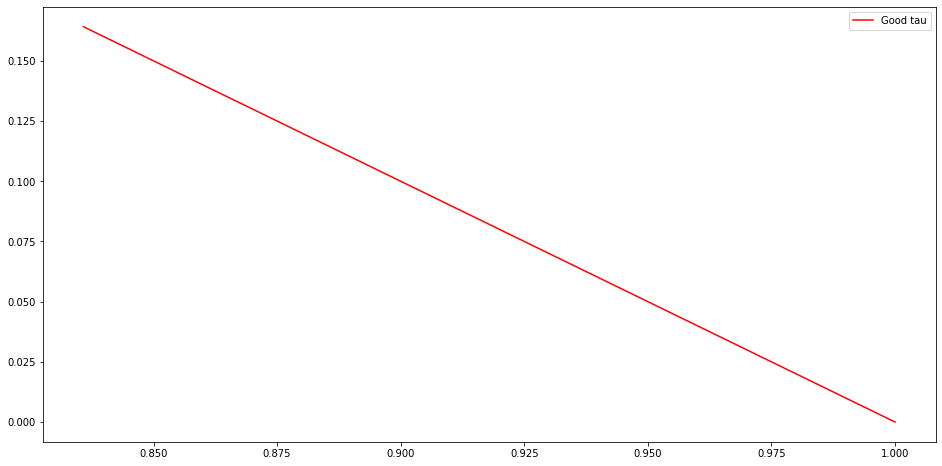

In [204]:
plt.figure(1, figsize=(16,8))
plt.plot(recall_goo_tau, fpr_goo_tau, label="Good tau", color="red")
plt.legend()
plt.show()

## Question 21

In [206]:
data = pd.read_csv("wine_dataset.csv")
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [209]:
X = data[['chlorides','total_sulfur_dioxide']]
y = data['style']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

## Question 22

## Question 23

## Question 24

## Question 25

## Fin